In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

In [8]:
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1', 'x2'])
    df['t'] = t
    return df

In [9]:
np.random.seed(20180801)
tf.set_random_seed(20180801)

df0 = generate_datablock(15, [7,7], 22, 0)
df1 = generate_datablock(15, [22,7], 22, 0)
df2 = generate_datablock(10, [7,22], 22, 0)
df3 = generate_datablock(25, [20,20], 22, 1)

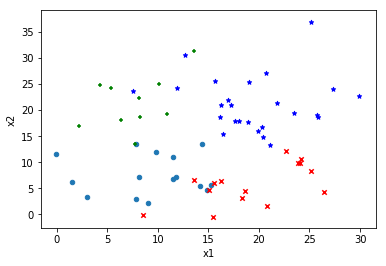

In [10]:
ax = df0.plot.scatter(x='x1',y='x2')
df1.plot.scatter(x='x1',y='x2', marker='x', c='r', ax=ax)
df2.plot.scatter(x='x1',y='x2', marker='+', c='g', ax=ax)
df3.plot.scatter(x='x1',y='x2', marker='*', c='b', ax=ax)

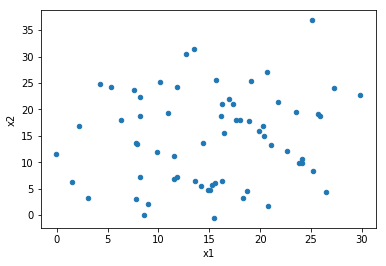

In [11]:
df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)
train_set.plot.scatter(x='x1', y='x2')

In [12]:
train_x = train_set[['x1', 'x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

In [15]:
num_units = 2
mult = train_x.flatten().mean()
mult

14.923111371249755

In [21]:
x = tf.placeholder(tf.float32, [None, 2])

w1 = tf.Variable(tf.truncated_normal([2, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1*mult)

w0 = tf.Variable(tf.zeros([num_units, 1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden1, w0) + b0*mult)